In [ ]:
%matplotlib inline
 
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler, Normalizer
from skimage.feature import hog
from skimage.io import imread
from skimage.transform import rescale
import seaborn as sns
import matplotlib.pyplot as plt   
from sklearn.metrics import confusion_matrix  
import skimage
import matplotlib.pyplot as plt
from google.colab import drive
import numpy as np
import pandas as pd
import os
import pprint
import zipfile

drive.mount('/content/gdrive', force_remount=True)
pp = pprint.PrettyPrinter(indent=4)

Mounted at /content/gdrive


In [ ]:
# #moving files to separate train and test
# import os
# import random

# import os
# import random
# import shutil

# source = "/content/gdrive/MyDrive/dissertacao_bruna/codes/data/raw/test_field_condition/"

# classes = ['healthy', 'cercospora']
# for c in classes:
  
#   orig = source+'test/'+c
#   dest = source+'train/'+c
#   files = os.listdir(orig)
#   no_of_files = 400

#   for file_name in random.sample(files, no_of_files):
#       shutil.move(os.path.join(orig, file_name), dest)

In [ ]:
import os

classes = ['healthy', 'cercospora']

path_count = '/content/gdrive/MyDrive/test_field_condition/train/'
for c in classes:
    print(c)
    onlyfiles = next(os.walk(path_count+c))[2] #dir is your directory path as string
    print(len(onlyfiles)) 


path_count = '/content/gdrive/MyDrive/test_field_condition/test/'
for c in classes:
    print(c)
    onlyfiles = next(os.walk(path_count+c))[2] #dir is your directory path as string
    print(len(onlyfiles)) 

healthy
400
cercospora
400
healthy
762
cercospora
113


In [ ]:
import joblib
from skimage.io import imread
from skimage.transform import resize
 
def resize_all(src, pklname, include, width=224, height=224):
    """
    load images from path, resize them and write them as arrays to a dictionary, 
    together with labels and metadata. The dictionary is written to a pickle file 
    named '{pklname}_{width}x{height}px.pkl'.
     
    Parameter
    ---------
    src: str
        path to data
    pklname: str
        path to output file
    width: int
        target width of the image in pixels
    include: set[str]
        set containing str
    """
    
    print(height)
    print(width)
    height = height if height is not None else width
     
    data = dict()
    data['description'] = 'resized ({0}x{1})plant images in rgb'.format(int(width), int(height))
    data['label'] = []
    data['filename'] = []
    data['data'] = []   
     
    pklname = f"{pklname}_{width}x{height}px.pkl"
 
    # read all images in PATH, resize and write to DESTINATION_PATH
    print(src)
    for subdir in os.listdir(src):
        if subdir in include:
            print(subdir)
            current_path = os.path.join(src, subdir)
 
            for file in os.listdir(current_path):
                if file[-3:] in {'jpg', 'png', 'JPG', 'PNG'}:
                    im = imread(os.path.join(current_path, file))
                    im = resize(im, (width, height)) #[:,:,::-1]
                    data['label'].append(subdir)
                    data['filename'].append(file)
                    data['data'].append(im)
        print(pklname)
        joblib.dump(data, pklname)

In [ ]:
# modify to fit your system
data_path_train = "/content/gdrive/MyDrive/test_field_condition/train/"
os.listdir(data_path_train)


data_path_test = "/content/gdrive/MyDrive/test_field_condition/test/"
os.listdir(data_path_test)

['healthy', 'cercospora', 'all_data']

In [ ]:
base_name_train = 'maize_train'
base_name_test = 'maize_test'
width = 80
height=80
 
include = {'healthy', 'cercospora'}

resize_all(src=data_path_train, pklname=base_name_train, width=width, height=height, include=include)
# resize_all(src=data_path_test, pklname=base_name_test, width=width, height=height, include=include)

80
80
/content/gdrive/MyDrive/mestrado/bigdata_ciencia_de_dados/Projeto de Disciplina - BD/test_field_condition/train/
healthy
maize_train_80x80px.pkl
cercospora
maize_train_80x80px.pkl
maize_train_80x80px.pkl
maize_train_80x80px.pkl


In [ ]:
from collections import Counter
 
data_train = joblib.load(f'{base_name_train}_{width}x{width}px.pkl')
 
print('number of samples: ', len(data_train['data']))
print('keys: ', list(data_train.keys()))
print('description: ', data_train['description'])
print('image shape: ', data_train['data'][0].shape)
print('labels:', np.unique(data_train['label']))
 
Counter(data_train['label'])

number of samples:  800
keys:  ['description', 'label', 'filename', 'data']
description:  resized (80x80)plant images in rgb
image shape:  (80, 80, 3)
labels: ['cercospora' 'healthy']


Counter({'healthy': 400, 'cercospora': 400})

In [ ]:
from collections import Counter
 
data_test = joblib.load(f'{base_name_test}_{width}x{width}px.pkl')
 
print('number of samples: ', len(data_test['data']))
print('keys: ', list(data_test.keys()))
print('description: ', data_test['description'])
print('image shape: ', data_test['data'][0].shape)
print('labels:', np.unique(data_test['label']))
 
Counter(data_test['label'])

number of samples:  875
keys:  ['description', 'label', 'filename', 'data']
description:  resized (80x80)plant images in rgb
image shape:  (80, 80, 3)
labels: ['cercospora' 'healthy']


Counter({'healthy': 762, 'cercospora': 113})

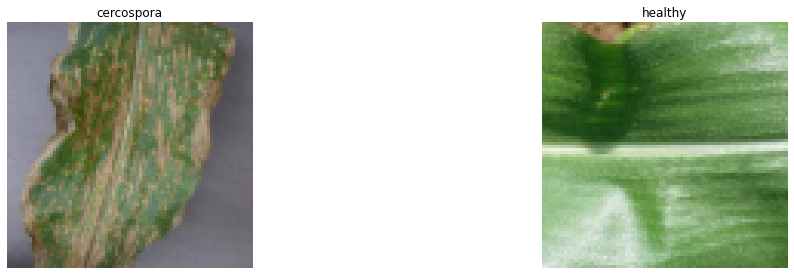

In [ ]:
labels = np.unique(data_train['label'])
 
# set up the matplotlib figure and axes, based on the number of labels
fig, axes = plt.subplots(1, len(labels))
fig.set_size_inches(15,4)
fig.tight_layout()
 
# make a plot for every label (equipment) type. The index method returns the 
# index of the first item corresponding to its search string, label in this case
for ax, label in zip(axes, labels):
    idx = data_train['label'].index(label)
     
    ax.imshow(data_train['data'][idx])
    ax.axis('off')
    ax.set_title(label)

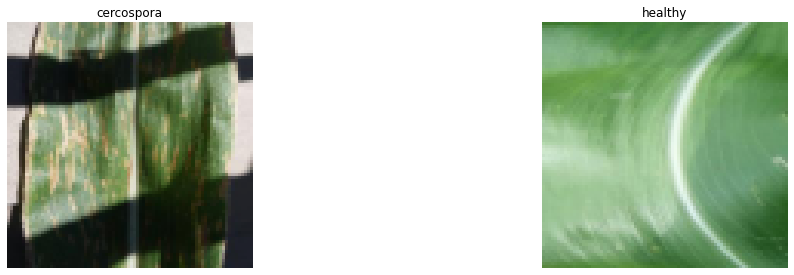

In [ ]:
labels = np.unique(data_test['label'])
 
# set up the matplotlib figure and axes, based on the number of labels
fig, axes = plt.subplots(1, len(labels))
fig.set_size_inches(15,4)
fig.tight_layout()
 
# make a plot for every label (equipment) type. The index method returns the 
# index of the first item corresponding to its search string, label in this case
for ax, label in zip(axes, labels):
    idx = data_test['label'].index(label)
     
    ax.imshow(data_test['data'][idx])
    ax.axis('off')
    ax.set_title(label)

In [ ]:
data_train['label'] = pd.Series(data_train["label"]).apply(lambda x:0 if x=="healthy" else 1)
data_test['label'] = pd.Series(data_test["label"]).apply(lambda x:0 if x=="healthy" else 1)

X_train = np.array(data_train['data'])
y_train = np.array(data_train['label'])

X_test = np.array(data_test['data'])
y_test = np.array(data_test['label'])

In [ ]:
data_train['label']

0      0
1      0
2      0
3      0
4      0
      ..
795    1
796    1
797    1
798    1
799    1
Length: 800, dtype: int64

In [ ]:
data_test['label']

0      0
1      0
2      0
3      0
4      0
      ..
870    1
871    1
872    1
873    1
874    1
Length: 875, dtype: int64

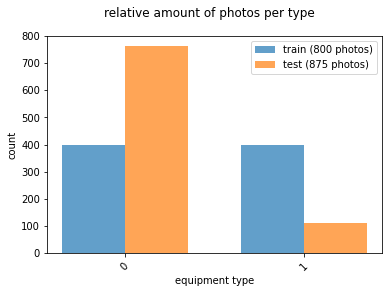

In [ ]:
def plot_bar(y, loc='left', relative=False):
    width = 0.35
    if loc == 'left':
        n = -0.5
    elif loc == 'right':
        n = 0.5
     
    # calculate counts per type and sort, to ensure their order
    unique, counts = np.unique(y, return_counts=True)
    sorted_index = np.argsort(unique)
    unique = unique[sorted_index]
     
    if relative:
        # plot as a percentage
        counts = 100*counts[sorted_index]/len(y)
        ylabel_text = '% count'
    else:
        # plot counts
        counts = counts[sorted_index]
        ylabel_text = 'count'
         
    xtemp = np.arange(len(unique))
     
    plt.bar(xtemp + n*width, counts, align='center', alpha=.7, width=width)
    plt.xticks(xtemp, unique, rotation=45)
    plt.xlabel('equipment type')
    plt.ylabel(ylabel_text)
 
plt.suptitle('relative amount of photos per type')
plot_bar(y_train, loc='left')
plot_bar(y_test, loc='right')
plt.legend([
    'train ({0} photos)'.format(len(y_train)), 
    'test ({0} photos)'.format(len(y_test))
]);

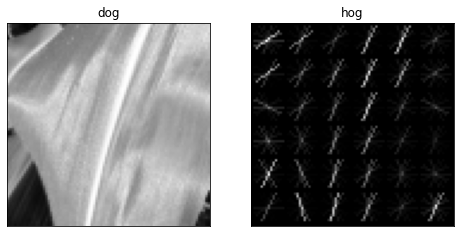

In [ ]:
from skimage.feature import hog
from skimage.io import imread
from skimage.transform import rescale

dog = imread('/content/gdrive/MyDrive/test_field_condition/train/healthy/026bd735-b9f4-4eab-86f3-23df15dbec95___R.S_HL 7938 copy.jpg', as_gray=True)
# https://en.wikipedia.org/wiki/German_Shepherd#/media/File:Kim_at_14_weeks.jpg
 
# scale down the image to one third
dog = rescale(dog, 1/3, mode='reflect')
# calculate the hog and return a visual representation.
dog_hog, dog_hog_img = hog(
    dog, pixels_per_cell=(14,14), 
    cells_per_block=(2, 2), 
    orientations=9, 
    visualize=True, 
    block_norm='L2-Hys')
 
fig, ax = plt.subplots(1,2)
fig.set_size_inches(8,6)
# remove ticks and their labels
[a.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False) 
    for a in ax]
 
ax[0].imshow(dog, cmap='gray')
ax[0].set_title('dog')
ax[1].imshow(dog_hog_img, cmap='gray')
ax[1].set_title('hog')
plt.show()

In [ ]:
print('number of pixels: ', dog.shape[0] * dog.shape[1])
print('number of hog features: ', dog_hog.shape[0])

number of pixels:  7225
number of hog features:  900


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
 
class RGB2GrayTransformer(BaseEstimator, TransformerMixin):
    """
    Convert an array of RGB images to grayscale
    """
 
    def __init__(self):
        pass
 
    def fit(self, X, y=None):
        """returns itself"""
        return self
 
    def transform(self, X, y=None):
        """perform the transformation and return an array"""
        return np.array([skimage.color.rgb2gray(img) for img in X])
     
 
class HogTransformer(BaseEstimator, TransformerMixin):
    """
    Expects an array of 2d arrays (1 channel images)
    Calculates hog features for each img
    """
 
    def __init__(self, y=None, orientations=9,
                 pixels_per_cell=(8, 8),
                 cells_per_block=(3, 3), block_norm='L2-Hys'):
        self.y = y
        self.orientations = orientations
        self.pixels_per_cell = pixels_per_cell
        self.cells_per_block = cells_per_block
        self.block_norm = block_norm
 
    def fit(self, X, y=None):
        return self
 
    def transform(self, X, y=None):
 
        def local_hog(X):
            return hog(X,
                       orientations=self.orientations,
                       pixels_per_cell=self.pixels_per_cell,
                       cells_per_block=self.cells_per_block,
                       block_norm=self.block_norm)
 
        try: # parallel
            return np.array([local_hog(img) for img in X])
        except:
            return np.array([local_hog(img) for img in X])

In [ ]:
import pandas as pd

def calc_TP_FP_rate(y_true, y_pred):
    

    # Convert predictions to series with index matching y_true
    y_pred = pd.Series(y_pred)
    y_true = pd.Series(y_true)
    
    # Instantiate counters
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    # Determine whether each prediction is TP, FP, TN, or FN
    for i in y_true.index: 
        if y_true[i]==y_pred[i]==1:
            TP += 1
        if y_pred[i]==1 and y_true[i]!=y_pred[i]:
            FP += 1
        if y_true[i]==y_pred[i]==0:
            TN += 1
        if y_pred[i]==0 and y_true[i]!=y_pred[i]:
            FN += 1
    
    # Calculate true positive rate and false positive rate
    tpr = TP / (TP + FN)
    fpr = FP / (FP + TN)

    return tpr, fpr

In [ ]:
# from mpl_toolkits.axes_grid1 import make_axes_locatable
 
# def plot_confusion_matrix(cmx, vmax1=None, vmax2=None, vmax3=None):
#     cmx_norm = 100*cmx / cmx.sum(axis=1, keepdims=True)
#     cmx_zero_diag = cmx_norm.copy()
 
#     np.fill_diagonal(cmx_zero_diag, 0)
 
#     fig, ax = plt.subplots(ncols=3)
#     fig.set_size_inches(12, 3)
#     [a.set_xticks(range(len(cmx)+1)) for a in ax]
#     [a.set_yticks(range(len(cmx)+1)) for a in ax]
         
#     im1 = ax[0].imshow(cmx, vmax=vmax1)
#     ax[0].set_title('as is')
#     im2 = ax[1].imshow(cmx_norm, vmax=vmax2)
#     ax[1].set_title('%')
#     im3 = ax[2].imshow(cmx_zero_diag, vmax=vmax3)
#     ax[2].set_title('% and 0 diagonal')
 
#     dividers = [make_axes_locatable(a) for a in ax]
#     cax1, cax2, cax3 = [divider.append_axes("right", size="5%", pad=0.1) 
#                         for divider in dividers]
 
#     fig.colorbar(im1, cax=cax1)
#     fig.colorbar(im2, cax=cax2)
#     fig.colorbar(im3, cax=cax3)
#     fig.tight_layout()
     
# plot_confusion_matrix(cmx)
 
# # the types appear in this order
# print('\n', sorted(np.unique(y_test)))

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

HOG_pipeline = Pipeline([
    ('grayify', RGB2GrayTransformer()),
    ('hogify', HogTransformer(
        pixels_per_cell=(8, 8), 
        cells_per_block=(2, 2), 
        orientations=8, 
        block_norm='L2-Hys')
    ),
    ('scalify', StandardScaler())
])

preprocessor = HOG_pipeline.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

def evaluate_pipeline(best_estimator, X_train, y_train, X_test, y_test, model_name):

  metrics_list = []

  y_train_pred = best_estimator.predict(X_train)

  
  accuracy = accuracy_score(y_train, y_train_pred)
  recall = recall_score(y_train, y_train_pred)
  precision = precision_score(y_train, y_train_pred)
  f1 = f1_score(y_train, y_train_pred)
  tpr, fpr = calc_TP_FP_rate(y_train, y_train_pred)


  metrics_list.append((model_name, 'train', accuracy, precision, recall, f1, tpr, fpr))

  y_test_pred = best_estimator.predict(X_test)

  accuracy = accuracy_score(y_test, y_test_pred)
  recall = recall_score(y_test, y_test_pred)
  precision = precision_score(y_test, y_test_pred)
  f1 = f1_score(y_test, y_test_pred)
  tpr, fpr = calc_TP_FP_rate(y_test, y_test_pred)

  metrics_list.append((model_name, 'test', accuracy, precision, recall, f1, tpr, fpr))

  cmx = confusion_matrix(y_test, y_test_pred)

  ax= plt.subplot()
  sns.heatmap(cmx, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

  # labels, title and ticks
  ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
  ax.set_title('Confusion Matrix'); 
  ax.xaxis.set_ticklabels(['health', 'cercospora']); ax.yaxis.set_ticklabels(['health', 'cercospora']);
  plt.show()
  
  return pd.DataFrame(metrics_list, columns=['classifier', 'train_test', 'accuracy', 'precision', 'recall', 'f1', 'tpr', 'fpr'])

LogisticRegression(max_iter=1000, random_state=42)


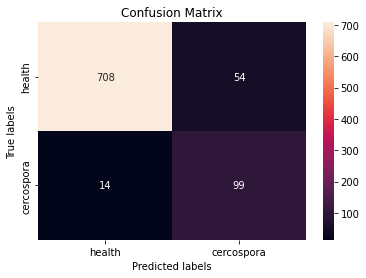

SVC(C=10, random_state=42)


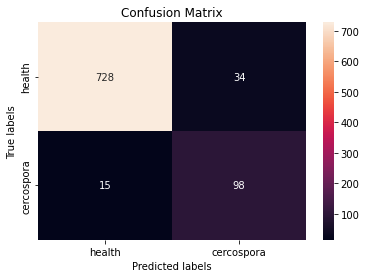

RandomForestClassifier(max_depth=5, n_estimators=200, random_state=42)


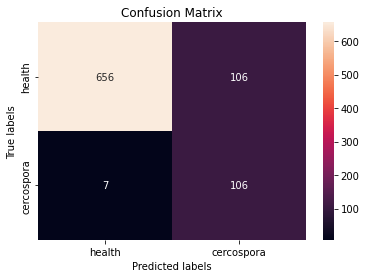

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

metrics = pd.DataFrame(columns = ['classifier', 'train_test', 'accuracy', 'precision', 'recall', 'f1', 'tpr', 'fpr'])

model_grid = {
    "logistic_reg":LogisticRegression(),
    "svm_svc":svm.SVC(),
    "rfc":RandomForestClassifier()
}

param_grid = {
    "logistic_reg":{
      "random_state":[42],
      "max_iter":[1000]
    }
    ,
    "svm_svc":{
        "random_state":[42],
        "kernel":['poly', 'rbf'],
        "C":[0.1, 10, 100]
    },
    "rfc":{
        "random_state":[42],
        "max_depth":[1, 3, 5],
        "n_estimators":[50, 100, 200]
    },
}

for model_name in param_grid:
  clf = GridSearchCV(model_grid[model_name], param_grid=param_grid[model_name], scoring='f1')
  current_pipeline = Pipeline(steps = [("preprocessor", preprocessor), (model_name, clf)])
  best_estimator = current_pipeline.fit(X_train, y_train)
  print(best_estimator[-1].best_estimator_)
  metrics_list = evaluate_pipeline(best_estimator, X_train, y_train, X_test, y_test, model_name)

  metrics = metrics.append(metrics_list, ignore_index = True)

In [ ]:
metrics.query('train_test == "test"')

,classifier,train_test,accuracy,precision,recall,f1,tpr,fpr
1,logistic_reg,test,0.922286,0.647059,0.876106,0.744361,0.876106,0.070866
3,svm_svc,test,0.944000,0.742424,0.867257,0.800000,0.867257,0.044619
5,rfc,test,0.870857,0.500000,0.938053,0.652308,0.938053,0.139108
